# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(find_dotenv())

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_BTC = 1.2
my_ETH = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price


btc_price = requests.get(btc_url).json()
btc_price = btc_price["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price


eth_price = requests.get(eth_url).json()
eth_price = eth_price["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto


btc_value = my_BTC * btc_price
eth_value = my_ETH * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_BTC} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_ETH} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $68424.48
The current value of your 5.3 ETH is $20847.96


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret


alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY") 

# Create the Alpaca API object


alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")



In [8]:
# Format current date as ISO format

## Trading date selected from 2017-07-23

today = pd.Timestamp("2017-07-23", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit=1000
).df

# Preview DataFrame


portfolio_df.sort_index()



AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-08-18 00:00:00-04:00  110.05  110.14  109.890  109.965  1453298.0   
2017-08-21 00:00:00-04:00  110.01  110.09  109.970  110.030  1606116.0   
2017-08-22 00:00:00-04:00  109.99  110.00  109.870  109.910  1596701.0   
2017-08-23 00:00:00-04:00  110.08  110.19  110.010  110.180  1696538.0   
2017-08-24 00:00:00-04:00  110.07  110.16  109.990  110.040  2003978.0   
...                           ...     ...      ...      ...        ...   
2021-08-04 00:00:00-04:00  116.77  116.83  116.300  116.570  4578711.0   
2021-08-05 00:00:00-04:00  116.46  116.48  116.280  116.320  3170931.0   
2021-08-06 00:00:00-04:00  115.93  116.02  115.780  115.790  3125122.0   
2021-08-09 00:00:00-04:00  115.89  115.96  115.580  115.590  5003990.0   
2021-08-10 00:00:00-04:00  115.65  115.65  115.435  115.440  6692325.0   

                              SPY                                         
                             open      high     low    close      volume  
time                                                                      
2017-08-18 00:00:00-04:00     NaN       NaN     NaN      NaN         NaN  
2017-08-21 00:00:00-04:00  242.64  243.2000  241.83  242.930  47802190.0  
2017-08-22 00:00:00-04:00  243.58  245.6200  243.55  245.400  49424448.0  
2017-08-23 00:00:00-04:00  244.35  245.0500  244.16  244.538  33779990.0  
2017-08-24 00:00:00-04:00  245.00  245.1800  243.75  244.030  40579279.0  
...                           ...       ...     ...      ...         ...  
2021-08-04 00:00:00-04:00  439.77  441.1243  438.73  439.010  40289514.0  
2021-08-05 00:00:00-04:00  440.22  441.8500  439.88  441.770  34903127.0  
2021-08-06 00:00:00-04:00  442.10  442.9400  441.80  442.520  40274051.0  
2021-08-09 00:00:00-04:00  442.45  442.7950  441.31  442.140  32740524.0  
2021-08-10 00:00:00-04:00  442.61  443.4400  441.88  442.660  39129442.0  

[1001 rows x 10 columns]

In [9]:
#Drop nulls

portfolio_df.isnull()
portfolio_df.dropna( inplace = True)

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = float(portfolio_df["AGG"]["close"][0])
spy_close_price = float(portfolio_df["SPY"]["close"][0])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $110.03
Current SPY closing price: $242.93


In [11]:
# Compute the current value of shares


spy_value = my_spy * spy_close_price
agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $12146.50
The current value of your 200 AGG shares is $22006.00


### Savings Health Analysis

In [12]:
# Set monthly household income

mon_income = 12000

# Consolidate financial assets data

savings_data = [
    btc_value + eth_value,
    spy_value + agg_value,
]

# Create savings DataFrame

df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Drop nulls
df_savings.isnull()
df_savings.dropna( inplace = True)

# Display savings DataFrame
display(df_savings)

,amount
crypto,89272.442865
shares,34152.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

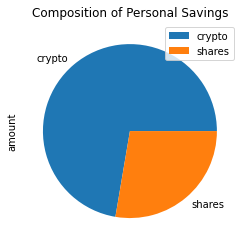

In [13]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = mon_income * 3

# Calculate total amount of savings

total_savings = float(df_savings.sum())

# Validate saving health


if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.

start_date = pd.Timestamp('2016-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


stock_data_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
stock_data_df.head()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2017-07-12 00:00:00-04:00  109.38  109.4300  109.26  109.38  1787218.0   
2017-07-13 00:00:00-04:00  109.29  109.3118  109.13  109.24  1432660.0   
2017-07-14 00:00:00-04:00  109.54  109.5600  109.29  109.36  1744770.0   
2017-07-17 00:00:00-04:00  109.40  109.4800  109.32  109.41  1910544.0   
2017-07-18 00:00:00-04:00  109.64  109.7100  109.58  109.68  2471170.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-07-12 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-07-13 00:00:00-04:00  244.02  244.55  243.76  244.41  29889284.0  
2017-07-14 00:00:00-04:00  244.42  245.97  244.31  245.54  40758038.0  
2017-07-17 00:00:00-04:00  245.47  245.91  245.33  245.51  22378971.0  
2017-07-18 00:00:00-04:00  245.06  245.72  244.67  245.69  31695494.0

In [17]:
# Checking for nulls

stock_data_df.isnull()
stock_data_df.dropna( inplace = True)

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


mc_30_year = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [19]:
# Printing the simulation input data


mc_30_year.portfolio_data.head()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2017-07-13 00:00:00-04:00  109.29  109.3118  109.13  109.24  1432660.0   
2017-07-14 00:00:00-04:00  109.54  109.5600  109.29  109.36  1744770.0   
2017-07-17 00:00:00-04:00  109.40  109.4800  109.32  109.41  1910544.0   
2017-07-18 00:00:00-04:00  109.64  109.7100  109.58  109.68  2471170.0   
2017-07-19 00:00:00-04:00  109.72  109.7500  109.63  109.70  1405289.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-07-13 00:00:00-04:00          NaN  244.02  244.55  243.76  244.41   
2017-07-14 00:00:00-04:00     0.001098  244.42  245.97  244.31  245.54   
2017-07-17 00:00:00-04:00     0.000457  245.47  245.91  245.33  245.51   
2017-07-18 00:00:00-04:00     0.002468  245.06  245.72  244.67  245.69   
2017-07-19 00:00:00-04:00     0.000182  246.02  247.00  246.01  246.99   

                                                    
                               volume daily_return  
time                                                
2017-07-13 00:00:00-04:00  29889284.0          NaN  
2017-07-14 00:00:00-04:00  40758038.0     0.004623  
2017-07-17 00:00:00-04:00  22378971.0    -0.000122  
2017-07-18 00:00:00-04:00  31695494.0     0.000733  
2017-07-19 00:00:00-04:00  31007738.0     0.005291

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns


mc_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002858,1.002830,0.995062,1.001876,0.990906,1.007009,1.003913,0.986582,1.010045,1.001906,...,1.004238,1.004662,0.989390,1.000921,0.999624,0.998385,1.003810,0.994095,0.995558,1.005100
2,1.014118,1.010190,0.995025,1.007828,0.989976,1.021338,0.999684,0.979789,1.006672,1.007986,...,0.991419,1.015585,0.987884,0.998069,1.009760,0.999193,1.012343,0.984497,0.998972,1.001298
3,1.013945,1.010286,0.997778,1.018080,0.984938,1.027118,1.006385,0.988732,1.009542,1.012250,...,0.994682,1.013146,1.003971,0.986969,1.024922,0.991101,1.031276,0.983383,0.987861,1.009526
4,1.021457,1.005091,0.983860,1.017861,0.981519,1.012685,1.009320,0.977948,1.013520,1.016406,...,0.989632,1.006120,0.999242,0.978339,1.029528,0.998317,1.020100,0.974487,0.978724,1.003591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.686880,42.924998,31.188647,13.098533,24.347823,4.795663,13.348704,12.507922,92.320106,24.878465,...,69.834996,13.848575,26.502831,12.957283,23.062387,18.307837,11.811498,18.443650,15.389171,37.493143
7557,18.543366,43.568613,31.121028,13.121021,24.088390,4.913795,13.452160,12.483283,93.432097,24.721865,...,69.649193,13.785607,26.529483,13.030461,23.260269,18.269666,11.853974,18.433278,15.579536,37.643972
7558,18.677017,43.342299,31.064948,13.272493,23.849143,4.922894,13.429718,12.543685,92.212202,24.631185,...,69.644094,13.757067,26.782692,12.924585,22.996242,18.216674,11.895233,18.294422,15.631479,37.610200
7559,18.835133,42.969067,31.222289,13.139727,23.517751,4.918438,13.623637,12.376494,92.017653,24.820597,...,69.571061,13.693784,26.709050,12.894164,23.136712,18.067976,11.967858,18.298132,15.622835,37.498359


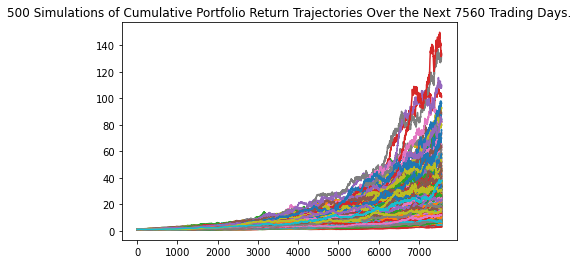

In [21]:
# Plot simulation outcomes

line_plot = mc_30_year.plot_simulation()

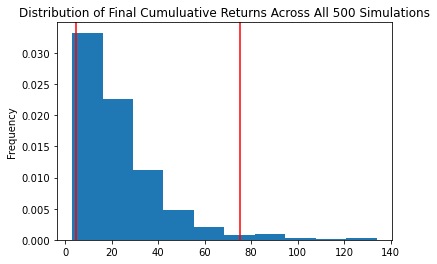

In [22]:
# Plot probability distribution and confidence intervals

dist_plot = mc_30_year.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results


tbl = mc_30_year.summarize_cumulative_return()

# Print summary statistics


print(tbl)

count           500.000000
mean             23.572079
std              18.632494
min               2.927363
25%              11.092620
50%              18.050129
75%              31.131337
max             133.948752
95% CI Lower      4.534712
95% CI Upper     75.026893
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000


ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90694.24 and $1500537.86


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $136041.36 and $2250806.79


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns


mc_5_year = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)


In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns


mc_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989277,0.997710,1.008748,1.012930,0.992656,0.998521,1.018988,0.999493,0.995389,0.992622,...,0.999983,0.996338,0.989580,0.983106,0.997678,1.005527,1.003503,0.993215,1.008475,1.013677
2,0.990587,1.006107,1.001553,1.012359,0.992605,1.006297,1.014848,0.996406,0.996264,0.982552,...,0.996713,1.007126,1.003707,0.990071,1.005088,1.005791,1.012126,1.011004,1.001677,1.002785
3,0.996648,1.005143,0.983631,1.014541,1.014914,0.995501,1.017786,1.013507,0.989830,0.967451,...,0.986192,1.016759,0.998988,0.999770,1.017724,1.004644,1.002248,1.025369,1.008859,1.007448
4,1.007025,1.002279,0.996419,1.014501,1.000221,0.985733,1.015507,1.011201,0.989181,0.956137,...,0.973764,1.018515,1.005390,0.980789,1.026531,0.995342,0.989044,1.030355,1.010144,1.003489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.180759,1.240260,2.179259,2.125725,2.003244,1.607275,1.437865,2.007894,2.423500,1.824892,...,1.547660,1.197466,2.904050,1.618389,1.480290,1.950329,1.106406,1.535874,1.029756,1.532637
1257,1.181047,1.237381,2.163784,2.131426,2.031687,1.626386,1.422895,2.028106,2.432782,1.818938,...,1.539530,1.208424,2.908208,1.640717,1.488432,1.938968,1.098115,1.539022,1.030307,1.529211
1258,1.182544,1.229982,2.158032,2.139661,2.007446,1.609756,1.399979,2.042587,2.428377,1.818746,...,1.533586,1.208213,2.875127,1.642444,1.480215,1.916024,1.121869,1.546824,1.034950,1.527797
1259,1.192563,1.230441,2.173389,2.137512,2.024860,1.599572,1.376707,2.035268,2.404215,1.807916,...,1.545228,1.219412,2.868602,1.650970,1.473260,1.931546,1.121786,1.559577,1.038810,1.558977


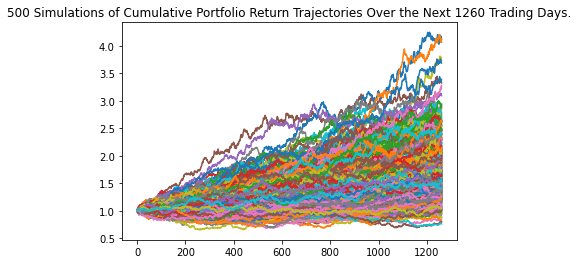

In [28]:
# Plot simulation outcomes


line_plot_5 = mc_5_year.plot_simulation()

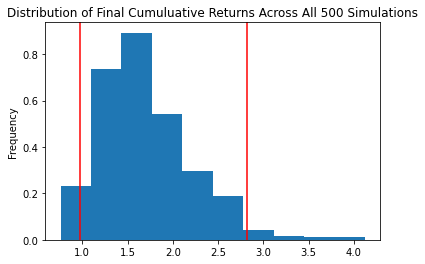

In [29]:
# Plot probability distribution and confidence intervals


dist_plot_5 = mc_5_year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results


tbl_5 = mc_5_year.summarize_cumulative_return()

# Print summary statistics

print(tbl_5)

count           500.000000
mean              1.713562
std               0.507972
min               0.759568
25%               1.363746
50%               1.622260
75%               2.019044
max               4.120023
95% CI Lower      0.977573
95% CI Upper      2.813988
Name: 1260, dtype: float64


In [31]:
# Set initial investment


initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


ci_lower_5 = round(tbl_5[8] * initial_investment,2)
ci_upper_5 = round(tbl_5[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58654.37 and $168839.3


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns


mc_10_year = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns


mc_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006490,0.998235,1.001894,0.999044,0.990542,1.007615,1.003382,0.987623,1.006611,1.001902,...,1.008017,1.010940,0.990005,0.999632,1.010840,1.012171,0.986904,1.008459,0.992733,1.010631
2,0.998043,1.001438,0.995877,0.996976,0.998949,1.008157,1.002675,0.981320,1.010726,0.989839,...,1.012378,1.029986,0.991379,0.991951,1.002708,1.016006,0.968677,1.023751,0.975206,0.998272
3,1.013066,1.012672,1.001880,0.986330,1.003560,1.006441,0.993447,0.985575,1.016266,0.999435,...,1.022232,1.034888,0.994357,0.989656,1.007440,1.008406,0.960035,1.029311,0.976607,1.005119
4,1.017946,0.999073,0.985752,0.998798,1.005196,1.003688,0.991608,0.994303,0.999191,1.007457,...,1.023410,1.038627,0.995944,0.987446,0.992089,1.010117,0.954470,1.022201,0.975687,1.004187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.389376,1.933880,3.346710,2.414753,2.421653,4.516942,1.851722,2.489249,2.349703,2.950476,...,2.013744,2.765447,4.370084,2.363566,3.059332,4.898288,0.852563,3.165836,1.776765,4.512218
2517,2.370909,1.930319,3.335019,2.411983,2.456644,4.503343,1.867897,2.474331,2.356906,2.923074,...,2.020531,2.780392,4.373696,2.356010,3.048385,4.888236,0.852626,3.178767,1.773966,4.512129
2518,2.354252,1.946385,3.332790,2.399955,2.491322,4.547578,1.876137,2.465333,2.358882,2.884988,...,2.028268,2.829694,4.360346,2.385083,3.013680,4.924330,0.848583,3.161722,1.738994,4.550016
2519,2.340479,1.968957,3.350110,2.419666,2.474211,4.588014,1.879844,2.474789,2.381068,2.909529,...,2.011190,2.834140,4.401183,2.387433,3.016832,4.932176,0.852724,3.148328,1.742430,4.531891


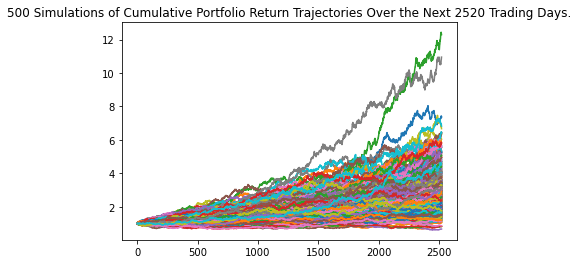

In [34]:
# Plot simulation outcomes

line_plot_10 = mc_10_year.plot_simulation()

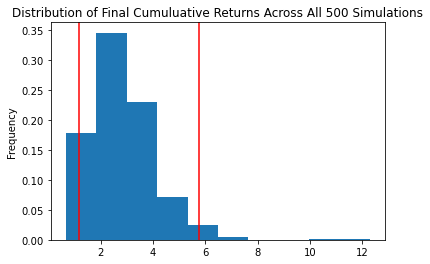

In [35]:
# Plot probability distribution and confidence intervals

dist_plot_10 = mc_10_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_10 = mc_10_year.summarize_cumulative_return()

# Print summary statistics

print(tbl_10)

count           500.000000
mean              2.840049
std               1.283940
min               0.660523
25%               1.931189
50%               2.636078
75%               3.412212
max              12.294711
95% CI Lower      1.171699
95% CI Upper      5.736998
Name: 2520, dtype: float64


In [37]:
# Set initial investment


initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


ci_lower_10 = round(tbl_10[8] * initial_investment,2)
ci_upper_10 = round(tbl_10[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70301.92 and $344219.91


# **Financial Planner Analysis**

By running the various Monte Carlo simulations we are able to uncover potential risk with the investment portfolio over the various time horizons. The data shows the change in standard deviation as listed below:

* 5 years 0.49
* 10 years 1.24
* 30 years 17.34

With knowing this information we are able to educate our clients on what is the best suitable time horizon to invest and what they could expect. Clients are able to make a more informed decision for their retirement planning. 
